# Introduction
This notebook performs data preprocessing for the hotel bookings dataset to prepare it for a cancellation prediction model.


# Import Libraries,Upload Data and Set Seaborn, Matplotlib and Pandas aesthetic parameters globally

In [58]:
# Importing Essential Libraries for Data Analysis & Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style='whitegrid', palette='deep', font_scale=1.2)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.dpi'] = 100

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)


#Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report
In this phase, we will explore the dataset to understand its structure, identify patterns, and uncover data quality issues. This includes generating summary statistics, checking for missing values, detecting outliers, and documenting key findings.

#  Step 1.1: Load the Data and Generate Summary Statistics

In [59]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')
print("Data loaded successfully.")

Saving hotel_bookings.csv to hotel_bookings (2).csv
Data loaded successfully.


In [60]:
display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [61]:
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.\n")

Dataset contains 119,390 rows and 32 columns.



In [62]:
# List all column names
print("Column names:")
print(df.columns.tolist())


Column names:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


# Generate Summary Statistics
We load the data and use .info() and .describe() to understand the structure and statistics.

In [63]:
print("\nDataFrame Info:")
df.info()
print()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12 

In [64]:
# Describe object (categorical) columns
print("\nSummary Statistics for Categorical Columns:")
display(df.describe(include='object'))


Summary Statistics for Categorical Columns:


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [65]:
print("\nSummary Statistics for numerical Columns:")
display(df.describe())


Summary Statistics for numerical Columns:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Step 1.2: Identify Missing Values
Examine missing values across the dataset:

* Calculate the percentage of missing values per column using (df.isnull().sum() / len(df)) * 100.
Visualize the missing data pattern using the missingno library:

* Create a missingno matrix with msno.matrix(df) to show the distribution of missing values.




This visualization will reveal if missing data is random or follows a pattern (e.g., certain columns missing together).

In [66]:
# Count missing values per column
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
missing_summary.sort_values(by='Missing %', ascending=False, inplace=True)

print("📊 Missing Data Summary:")
print(missing_summary)

📊 Missing Data Summary:
          Missing Count  Missing %
company          112593  94.306893
agent             16340  13.686238
country             488   0.408744
children              4   0.003350


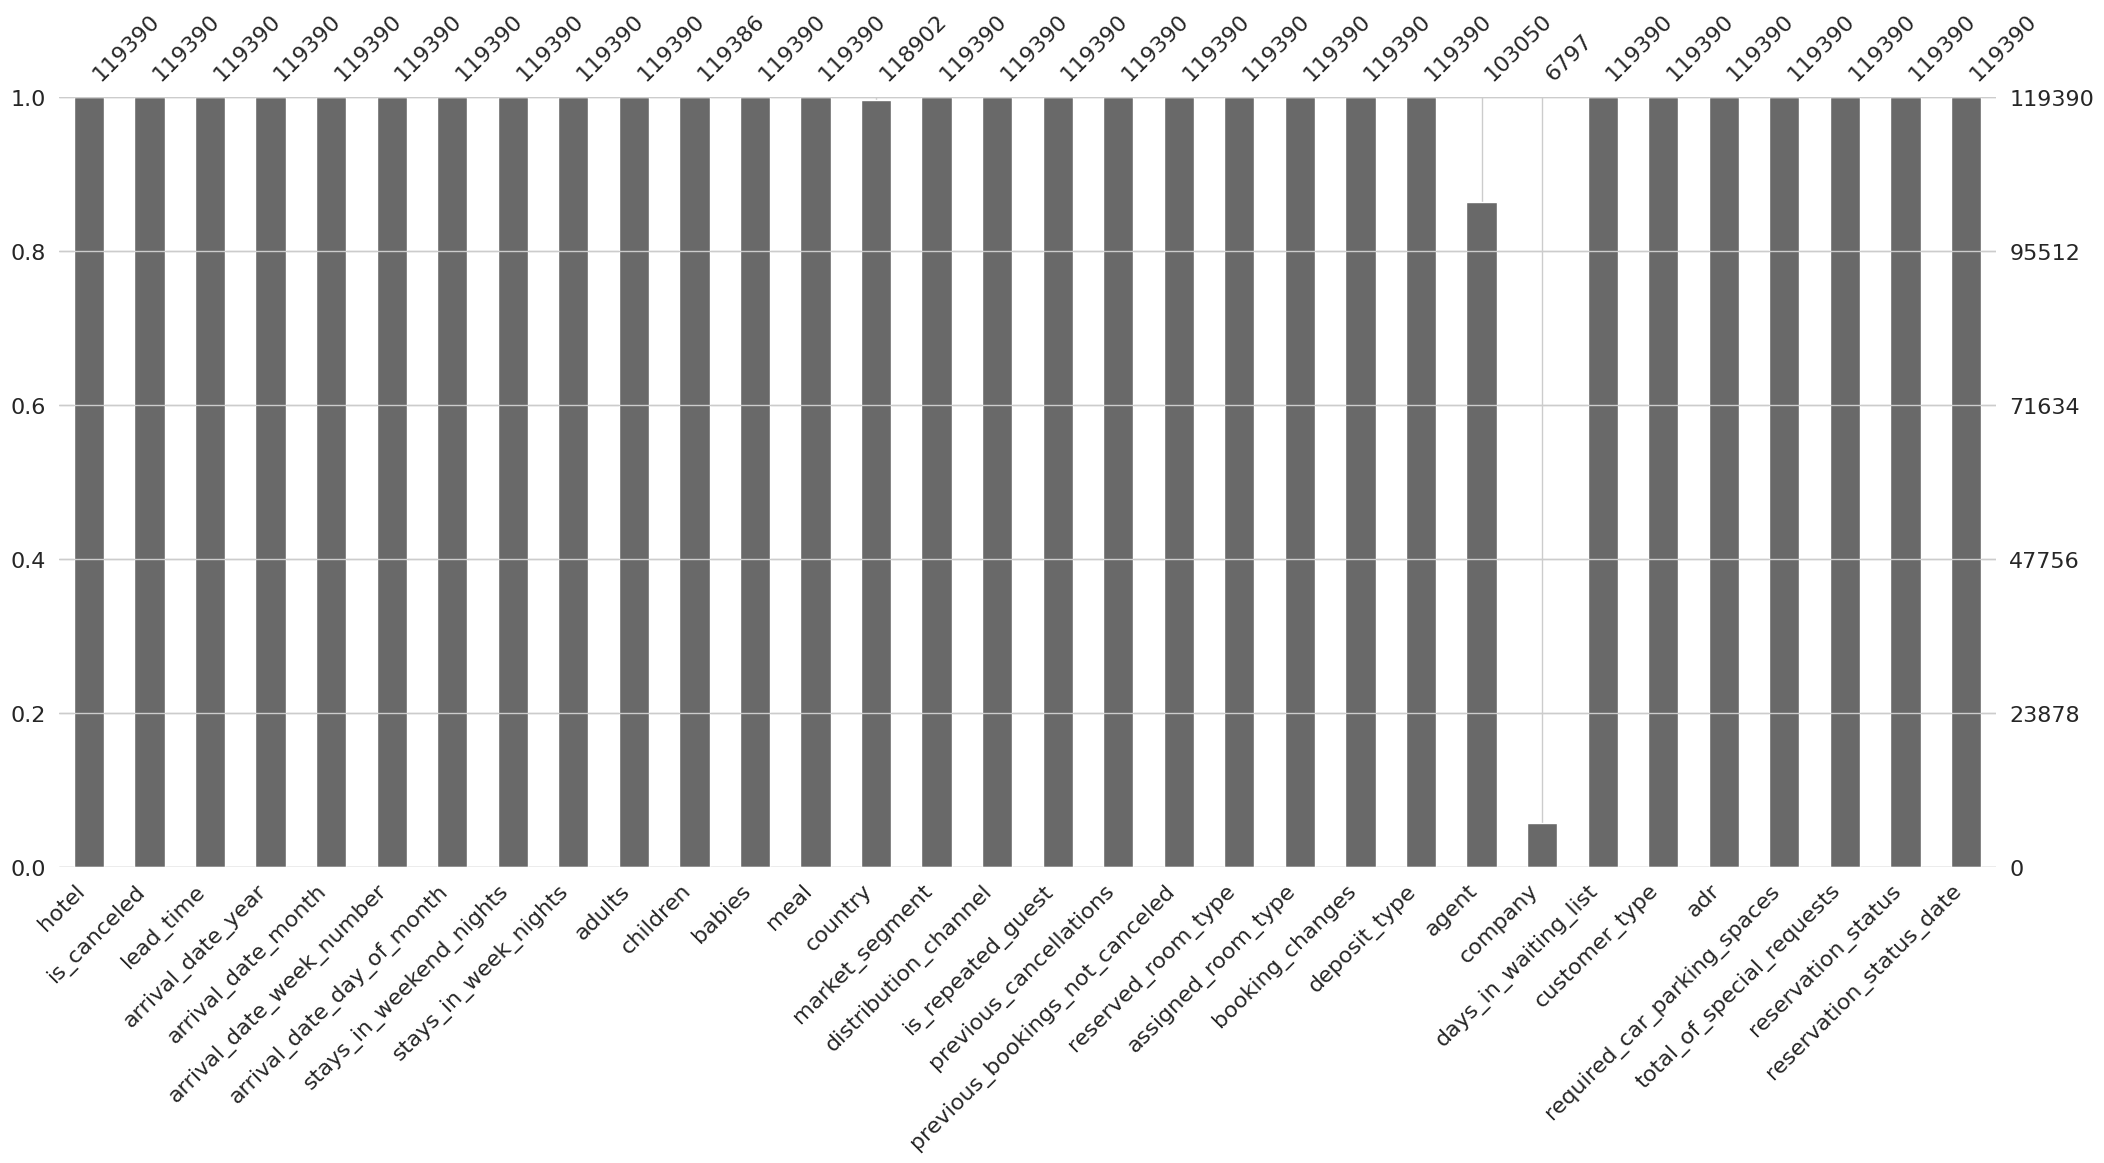

In [67]:

msno.bar(df)
plt.show()

# Step 1.3: Detect Outliers in Key Numerical Columns
Focus on key numerical columns like adr (average daily rate) and lead_time:

* Use boxplots for visualization: sns.boxplot(x=df['adr']) and sns.boxplot(x=df['lead_time']).
Apply the IQR method to detect outliers:

* Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column.
Define IQR = Q3 - Q1.
Identify outliers as values below Q1 - 1.5IQR or above Q3 + 1.5IQR.


* Count and list the number of outliers for each column.

These steps will highlight extreme values that could skew analysis or modeling.

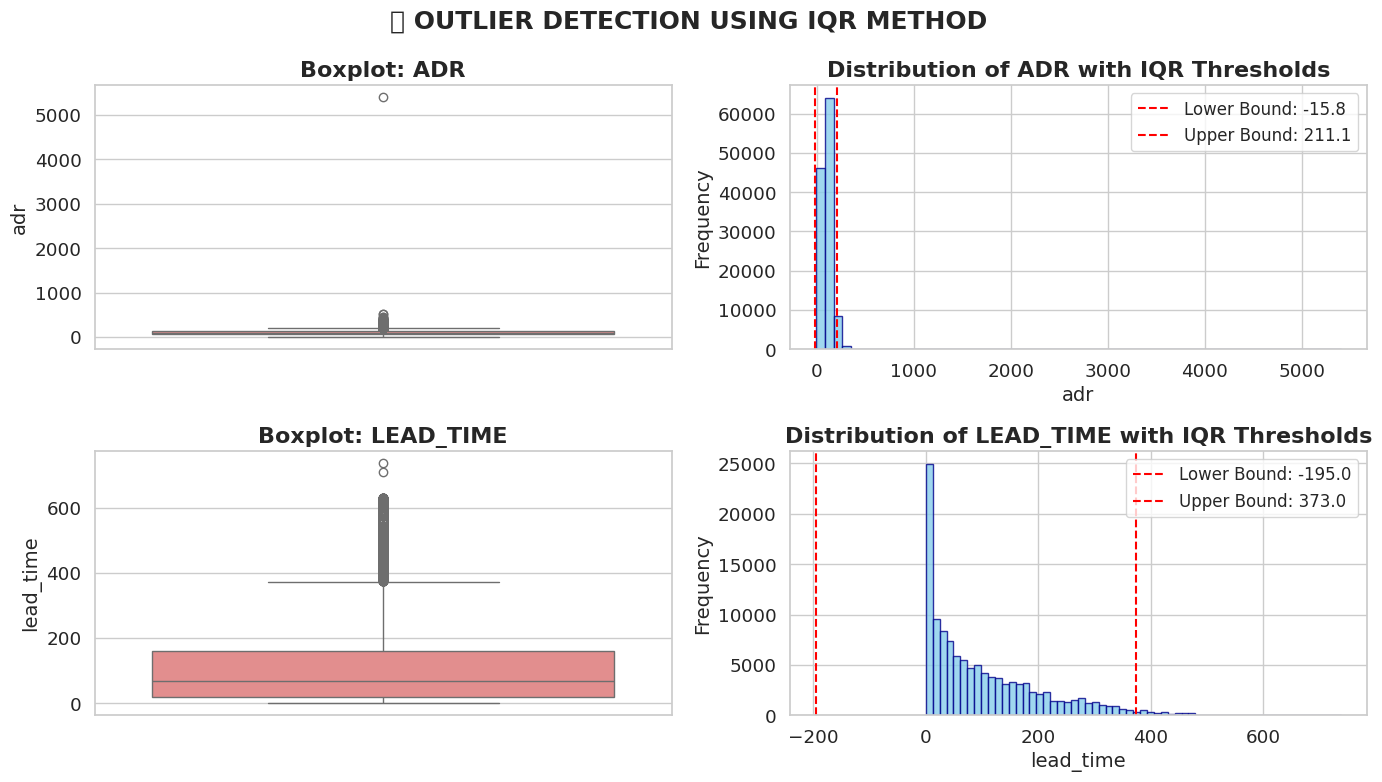

In [68]:
def detect_outliers_iqr(series):
    """Returns outlier values and bounds using IQR method."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

# Key numerical columns for outlier analysis
key_cols = ['adr', 'lead_time']

# Create subplots
fig, axes = plt.subplots(len(key_cols), 2, figsize=(14, 8))

for i, col in enumerate(key_cols):
    data = df[col].dropna()

    # Skip if column is empty
    if data.empty:
        continue

    # --- Boxplot ---
    sns.boxplot(y=data, ax=axes[i, 0], color='lightcoral')
    axes[i, 0].set_title(f"Boxplot: {col.upper()}", fontweight='bold')
    axes[i, 0].set_ylabel(col)

    # --- Histogram with IQR bounds ---
    axes[i, 1].hist(data, bins=60, color='skyblue', edgecolor='darkblue', alpha=0.8)

    # Get IQR bounds
    _, lb, ub = detect_outliers_iqr(data)

    # Add threshold lines
    axes[i, 1].axvline(lb, color='red', linestyle='--', label=f'Lower Bound: {lb:.1f}')
    axes[i, 1].axvline(ub, color='red', linestyle='--', label=f'Upper Bound: {ub:.1f}')
    axes[i, 1].set_title(f"Distribution of {col.upper()} with IQR Thresholds", fontweight='bold')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].legend()

# Overall title and layout
plt.suptitle("📉 OUTLIER DETECTION USING IQR METHOD", fontsize=18, weight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [69]:
print("🧮 OUTLIER ANALYSIS USING IQR METHOD")
print("=" * 50)
for col in key_cols:
    data = df[col].dropna()
    outliers, lb, ub = detect_outliers_iqr(data)

    print(f"\n➡️ {col.upper()}:")
    print(f"   • Total Records: {len(data):,}")
    print(f"   • Outliers Detected: {len(outliers):,} ({len(outliers)/len(data)*100:.1f}%)")
    print(f"   • IQR Bounds: [ {lb:.2f}, {ub:.2f} ]")
    if len(outliers) > 0:
        print(f"   • Outlier Range: {outliers.min():.2f} → {outliers.max():.2f}")

🧮 OUTLIER ANALYSIS USING IQR METHOD

➡️ ADR:
   • Total Records: 119,390
   • Outliers Detected: 3,793 (3.2%)
   • IQR Bounds: [ -15.77, 211.06 ]
   • Outlier Range: 211.08 → 5400.00

➡️ LEAD_TIME:
   • Total Records: 119,390
   • Outliers Detected: 3,005 (2.5%)
   • IQR Bounds: [ -195.00, 373.00 ]
   • Outlier Range: 374.00 → 737.00


#Step 1.4: Document Findings and Data Quality Issues
* Based on the EDA:

- Summary Statistics Insights: Note any anomalies, such as negative values in columns where they don't make sense (e.g., adr should not be negative) or unusually high max values.
Missing Values: Columns with missing data are as follows:

#📊 Missing Data Summary:

- company: 112593 missing (94.306893%)
- agent: 16340 missing (13.686238%)
- country: 488 missing (0.408744%)
- children: 4 missing (0.003350%)



#🧮 OUTLIER ANALYSIS USING IQR METHOD
* ➡️ ADR:
- Total Records: 119,390
- Outliers Detected: 3,793 (3.2%)
- IQR Bounds: [ -15.77, 211.06 ]
- Outlier Range: 211.08 → 5400.00
* ➡️ LEAD_TIME:
- Total Records: 119,390
- Outliers Detected: 3,005 (2.5%)
- IQR Bounds: [ -195.00, 373.00 ]
- Outlier Range: 374.00 → 737.00



#Main Data Quality Issues:

- High missing values in company (94.306893%) and agent (13.686238%), which are optional fields.
- Minor missing in country (0.408744%) and children (0.003350%), due to data entry errors.
- Outliers in pricing and timing columns that distort models.
- Potential duplicates from repeated bookings.
- Data types: Ensure columns like reservation_status_date are datetime, not strings.
- Overall, the dataset is mostly clean but requires imputation, outlier handling, and type corrections for robust modeling.

# Phase 2: Data Cleaning (The Core of the Project)
This phase focuses on addressing the issues identified in EDA. We'll handle missing values with justified strategies, remove duplicates, cap outliers, and fix data types to create a clean dataset.

# Step 2.1: Handle Missing Values

In [70]:
# Improved imputation
df['children'] = df['children'].fillna(df['children'].median()).astype(int)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['agent'] = df['agent'].fillna(0).astype(int)
df = df.drop('company', axis=1)  # Drop high-missing column

# Create indicator for agent
df['has_agent'] = (df['agent'] != 0).astype(int)

# Confirm no more missing values
print("✅ Missing values after imputation:")
print(df.isnull().sum().sum())  # Should be 0

✅ Missing values after imputation:
0


# Step 2.2: Remove Duplicates

In [71]:
# Identify duplicates
duplicates = df.duplicated().sum()
print(f"📊 Found {duplicates} duplicate rows")

# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
print(f"✅ Dataset after dropping duplicates: {df.shape[0]} rows")

📊 Found 32020 duplicate rows
✅ Dataset after dropping duplicates: 87370 rows


# Step 2.3: Handle Outliers

In [72]:
# Function for IQR clipping
def clip_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Handle adr
print(f" Before: Min ADR = {df['adr'].min():.2f}")
df.loc[df['adr'] < 0, 'adr'] = 0  # Correct negative price
df['adr'] = clip_outliers(df['adr'])
print(f" ADR after clipping. Max ADR now: {df['adr'].max():.2f}")

# Handle lead_time
df['lead_time'] = clip_outliers(df['lead_time'])
print(f" Lead_time after clipping. Max lead_time now: {df['lead_time'].max():.2f}")

 Before: Min ADR = -6.38
 ADR after clipping. Max ADR now: 227.00
 Lead_time after clipping. Max lead_time now: 296.00


# Step 2.4: Fix Data Types

In [73]:
# Convert to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
print("✅ reservation_status_date converted to datetime")

# Convert categorical columns to 'category' type (saves memory) - temporarily, before encoding
categorical_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print(f"✅ Converted {len(categorical_cols)} columns to 'category' dtype")

✅ reservation_status_date converted to datetime
✅ Converted 11 columns to 'category' dtype


In [74]:
# Final dataset summary
print("\n" + "="*50)
print("📊 FINAL DATASET INFO AFTER CLEANING")
print("="*50)
print(df.info())

print(f"\n✅ Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✅ Memory usage: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")


📊 FINAL DATASET INFO AFTER CLEANING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87370 entries, 0 to 87369
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87370 non-null  category      
 1   is_canceled                     87370 non-null  int64         
 2   lead_time                       87370 non-null  int64         
 3   arrival_date_year               87370 non-null  int64         
 4   arrival_date_month              87370 non-null  category      
 5   arrival_date_week_number        87370 non-null  int64         
 6   arrival_date_day_of_month       87370 non-null  int64         
 7   stays_in_weekend_nights         87370 non-null  int64         
 8   stays_in_week_nights            87370 non-null  int64         
 9   adults                          87370 non-null  int64         
 10  children                        8

# Phase 3: Feature Engineering & Preprocessing
In this phase, we'll engineer new features to enhance model predictiveness, encode categoricals for machine learning compatibility, and remove leakage-prone columns.

# Step 3.1: Create New Features
Add derived columns to capture more insights:

* total_guests = adults + children + babies: Represents the total people per booking, useful for capacity analysis.
* total_nights = stays_in_weekend_nights + stays_in_week_nights: Total stay duration, simplifying length-related predictions.
* is_family: A binary flag (1 if children + babies > 0, else 0) to indicate family bookings.

These features consolidate related information and can improve model performance on cancellation predictions.

In [75]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print(" Created 'total_guests' = adults + children + babies")

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print(" Created 'total_nights' = weekend + week nights")

df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)  # Binary 0/1
print(" Created 'is_family' binary flag (1 if children or babies)")

# Remove invalid rows
df = df[df['total_guests'] > 0].reset_index(drop=True)
print(f" Removed zero-guest bookings. New shape: {df.shape}")

print("📊 Categorical Column Cardinality:")
for col in df.select_dtypes(include='category').columns:
    print(f"  {col}: {df[col].nunique()} unique values")

 Created 'total_guests' = adults + children + babies
 Created 'total_nights' = weekend + week nights
 Created 'is_family' binary flag (1 if children or babies)
 Removed zero-guest bookings. New shape: (87204, 35)
📊 Categorical Column Cardinality:
  hotel: 2 unique values
  arrival_date_month: 12 unique values
  meal: 5 unique values
  country: 177 unique values
  market_segment: 8 unique values
  distribution_channel: 5 unique values
  reserved_room_type: 9 unique values
  assigned_room_type: 11 unique values
  deposit_type: 3 unique values
  customer_type: 4 unique values
  reservation_status: 3 unique values


# Step 3.2: Encode Categorical Variables

In [76]:
# Frequency Encoding for high-cardinality column "country" first
country_freq = df['country'].value_counts(normalize=True)
df['country_encoded'] = df['country'].map(country_freq)
df = df.drop('country', axis=1)
print(" Successfully Frequency Encoded 'country'")

# Columns to one-hot encode (expanded to all relevant categoricals)
ohe_cols = [
    'hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'
]

df = pd.get_dummies(df, columns=ohe_cols, prefix=ohe_cols, drop_first=True)
print(f"✅ One-Hot Encoded {len(ohe_cols)} columns (drop_first=True)")

 Successfully Frequency Encoded 'country'
✅ One-Hot Encoded 9 columns (drop_first=True)


# Step 3.3: Remove Data Leakage

In [77]:
# CRITICAL: Remove data leakage
leakage_cols = ['reservation_status', 'reservation_status_date', 'assigned_room_type']

# Check if they exist before dropping
cols_to_drop = [col for col in leakage_cols if col in df.columns]

if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
    print(f" REMOVED DATA LEAKAGE: Dropped columns → {cols_to_drop}")
else:
    print(" No leakage columns found (already removed)")

 REMOVED DATA LEAKAGE: Dropped columns → ['reservation_status', 'reservation_status_date']


In [78]:
# Final dataset summary
print("\n" + "="*50)
print("📊 FINAL DATASET INFO AFTER CLEANING")
print("="*50)
print(df.info())

print(f"\n✅ Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✅ Memory usage: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

df.head()


📊 FINAL DATASET INFO AFTER CLEANING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87204 entries, 0 to 87203
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87204 non-null  int64  
 1   lead_time                       87204 non-null  int64  
 2   arrival_date_year               87204 non-null  int64  
 3   arrival_date_week_number        87204 non-null  int64  
 4   arrival_date_day_of_month       87204 non-null  int64  
 5   stays_in_weekend_nights         87204 non-null  int64  
 6   stays_in_week_nights            87204 non-null  int64  
 7   adults                          87204 non-null  int64  
 8   children                        87204 non-null  int64  
 9   babies                          87204 non-null  int64  
 10  is_repeated_guest               87204 non-null  int64  
 11  previous_cancellations          87204 non-null  int64  


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,has_agent,total_guests,total_nights,is_family,country_encoded,hotel_Resort Hotel,...,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,296,2015,27,1,0,0,2,0,0,0,0,0,3,0,0,0.0,0,0,0,2,0,0,0.318552,True,...,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,296,2015,27,1,0,0,2,0,0,0,0,0,4,0,0,0.0,0,0,0,2,0,0,0.318552,True,...,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,0,0,0,75.0,0,0,0,1,1,0,0.119524,True,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,0,304,0,75.0,0,0,1,1,1,0,0.119524,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,240,0,98.0,0,1,1,2,2,0,0.119524,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


# Final Preparation: Split dataset into training and testing sets

In [79]:
from sklearn.model_selection import train_test_split

target = 'is_canceled'

# Define features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Confirm shapes
print(" Train-Test Split Complete (stratified)")
print(f" Dataset Shape: {df.shape}")
print(f"📌 X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"📌 X_test:  {X_test.shape}  | y_test:  {y_test.shape}")

 Train-Test Split Complete (stratified)
 Dataset Shape: (87204, 76)
📌 X_train: (69763, 75) | y_train: (69763,)
📌 X_test:  (17441, 75)  | y_test:  (17441,)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,has_agent,total_guests,total_nights,is_family,country_encoded,hotel_Resort Hotel,...,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,296,2015,27,1,0,0,2,0,0,0,0,0,3,0,0,0.0,0,0,0,2,0,0,0.318552,True,...,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,296,2015,27,1,0,0,2,0,0,0,0,0,4,0,0,0.0,0,0,0,2,0,0,0.318552,True,...,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,0,0,0,75.0,0,0,0,1,1,0,0.119524,True,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,0,304,0,75.0,0,0,1,1,1,0,0.119524,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,240,0,98.0,0,1,1,2,2,0,0.119524,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
